In [1]:
%matplotlib inline 
import torch
import matplotlib.pyplot as plt

In [2]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hide_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=1, out_features=n_hide_neurons, bias=True)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(in_features=n_hide_neurons, out_features=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
        
        
net = RegressionNet(50)

In [3]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);
# ------Dataset preparation end--------:

In [4]:
def metric(pred, target):
    return (pred - target).abs().mean()

In [5]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [6]:
def loss(pred, target):
    return ((pred - target) ** 2).mean()

In [7]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    
    optimizer.step()

print(metric(net.forward(x_validation), y_validation).item())

0.023219754919409752


In [8]:
def visualize(x, target, y_pred):
#     y_pred = net.forward(x)
    plt.plot(x.numpy(), target.numpy(), 'o', c='r', label='Target')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', label='Prediction')
    
    plt.legend(loc='upper left')
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.title('$y(x) = 2^x * sin(2^-x)$')

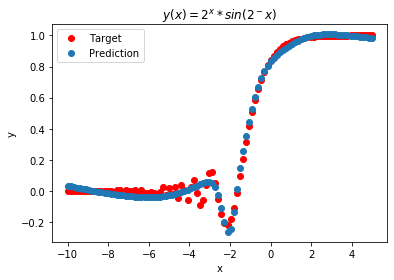

In [9]:
visualize(x_validation, y_validation, y_pred)